# Preprocessing Data: DataFrame with Pandas

The data is split into 2 CSV files, true and fake news. We will first view the two files seperately and then merge in order to split into train and test datasets. 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving true_news.csv to true_news.csv
Saving fake_news.csv to fake_news.csv


In [2]:
# Import dependencies
import io
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import tensorflow as tf 
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding

from collections import Counter
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#  Import and read the Fake.csv.
fake_news_df = pd.read_csv(io.BytesIO(uploaded['fake_news.csv']))
fake_news_df.head()

,title,text,subject,date,year
0,JUST IN: CROOKED DOJ OFFICIAL Didn’t Reveal Th...,We ve been covering the curious case of DOJ of...,politics,2018-02-14,2018
1,POLITICS FIRST: LEFTIST PARENTS Of Former Comb...,The heartbreaking story of two parents who put...,politics,2018-02-15,2018
2,TWO HIGH SCHOOL JROTC Members Tell INCREDIBLE ...,ABC News When two Marjory Stoneman Douglas Hi...,politics,2018-02-15,2018
3,MEDIA PROMOTES Fake News That Shooter Connecte...,The mainstream media is guilty of fake news wh...,politics,2018-02-15,2018
4,"WHAT’S WRONG WITH PELOSI? Nancy Stutters, Stam...",What s wrong with Pelosi? Nancy Pelosi is supp...,politics,2018-02-15,2018


Add 'title' length to fake news

In [37]:
fake_news_df['title_length']  = fake_news_df['title'].str.len()

In [39]:
fake_news_df.head()

,title,text,subject,date,year,label,title_length
0,JUST IN: CROOKED DOJ OFFICIAL Didn’t Reveal Th...,We ve been covering the curious case of DOJ of...,politics,2018-02-14,2018,0,115
1,POLITICS FIRST: LEFTIST PARENTS Of Former Comb...,The heartbreaking story of two parents who put...,politics,2018-02-15,2018,0,126
2,TWO HIGH SCHOOL JROTC Members Tell INCREDIBLE ...,ABC News When two Marjory Stoneman Douglas Hi...,politics,2018-02-15,2018,0,154
3,MEDIA PROMOTES Fake News That Shooter Connecte...,The mainstream media is guilty of fake news wh...,politics,2018-02-15,2018,0,74
4,"WHAT’S WRONG WITH PELOSI? Nancy Stutters, Stam...",What s wrong with Pelosi? Nancy Pelosi is supp...,politics,2018-02-15,2018,0,101


Change date column datatype

In [4]:
fake_news_df.dtypes

title      object
text       object
subject    object
date       object
year        int64
dtype: object

In [5]:
# Format date column
fake_news_df["date"]=pd.to_datetime(fake_news_df["date"])

In [6]:
fake_news_df.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
year                int64
dtype: object

Viewing the shape and types of data.

In [7]:
fake_news_df.nunique()

title      17897
text       17449
subject        6
date        1010
year           4
dtype: int64

In [8]:
fake_news_df['subject'].value_counts()

News               9050
politics           6836
left-news          4456
Government News    1568
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [9]:
#  Import and read the True.csv.
true_news_df = pd.read_csv(io.BytesIO(uploaded['true_news.csv']))
true_news_df.head()

,title,text,subject,date,year
0,Trump sued in Kentucky by three who say he inc...,"LOUISVILLE, Ky. (Reuters) - Three people who c...",politicsNews,2016-04-01,2016
1,"In record year for political ads, media buyers...",(Reuters) - Media buyers expect record politic...,politicsNews,2016-04-01,2016
2,"Obama, Republicans urge Trump to soften tone",WASHINGTON (Reuters) - Donald Trump is facing ...,politicsNews,2016-04-01,2016
3,State Department says halts review of Clinton ...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,2016-04-01,2016
4,Obama: Trump doesn't know much about foreign p...,WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,2016-04-01,2016


Add 'title' length to true news dataframe

In [35]:
true_news_df['title_length']  = true_news_df['title'].str.len()

In [36]:
true_news_df.head()

,title,text,subject,date,year,label,title_length
0,Trump sued in Kentucky by three who say he inc...,"LOUISVILLE, Ky. (Reuters) - Three people who c...",politicsNews,2016-04-01,2016,1,68
1,"In record year for political ads, media buyers...",(Reuters) - Media buyers expect record politic...,politicsNews,2016-04-01,2016,1,64
2,"Obama, Republicans urge Trump to soften tone",WASHINGTON (Reuters) - Donald Trump is facing ...,politicsNews,2016-04-01,2016,1,44
3,State Department says halts review of Clinton ...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,2016-04-01,2016,1,67
4,Obama: Trump doesn't know much about foreign p...,WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,2016-04-01,2016,1,58


Change date col datatype

In [10]:
true_news_df.dtypes

title      object
text       object
subject    object
date       object
year        int64
dtype: object

In [11]:
# Format date column
true_news_df["date"]=pd.to_datetime(true_news_df["date"])

In [12]:
# Preview date change
true_news_df.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
year                int64
dtype: object

Data Exploration

In [13]:
true_news_df.nunique()

title      20826
text       21192
subject        2
date         716
year           2
dtype: int64

In [14]:
true_news_df['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

Labelling the data to prepare for the supervised machine learning model.

In [15]:
# Label fake and real data 0 and 1 
true_news_df['label']=1
fake_news_df['label']=0

Merging the dataframes and dropping columns that will skew the data.

In [16]:
# Merge dfs
frames = [true_news_df, fake_news_df]
real_or_fake_df = pd.concat(frames)

# Drop subject columns as will skew the data 
real_or_fake_df=real_or_fake_df.drop(columns=['subject'],axis=1)
# Drop date column as data not needed 
real_or_fake_df=real_or_fake_df.drop(columns=['date'],axis=1)
# Drop year column no longer needed 
real_or_fake_df=real_or_fake_df.drop(columns=['year'],axis=1)
# Drop title_length column no longer needed 
real_or_fake_df=real_or_fake_df.drop(columns=['title_length'],axis=1)

In [17]:
real_or_fake_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 0 to 23470
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44888 non-null  object
 1   text    44888 non-null  object
 2   label   44888 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


Checking for duplicates, which will again skew the data and potentially lead to an overfitted model.

In [18]:
real_or_fake_df.duplicated().sum()

5789

In [19]:
real_or_fake_df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [20]:
real_or_fake_df.drop_duplicates()

,title,text,label
0,Trump sued in Kentucky by three who say he inc...,"LOUISVILLE, Ky. (Reuters) - Three people who c...",1
1,"In record year for political ads, media buyers...",(Reuters) - Media buyers expect record politic...,1
2,"Obama, Republicans urge Trump to soften tone",WASHINGTON (Reuters) - Donald Trump is facing ...,1
3,State Department says halts review of Clinton ...,WASHINGTON (Reuters) - The U.S. State Departme...,1
4,Obama: Trump doesn't know much about foreign p...,WASHINGTON (Reuters) - U.S. President Barack O...,1
...,...,...,...
23465,Sen. Tim Scott: Running A Small Business Make...,"The 2016 Values Voter Summit is underway, and ...",0
23467,Red Cross Raises Tens Of Millions And You Won...,Americans are opening their wallets and donati...,0
23468,New Study Proves That Trump Supporters Are Ra...,Despite the fact that Donald Trump and his fan...,0
23469,Two Florida Lawmakers Just Voted Against Hurr...,Two Florida Republican lawmakers voted against...,0


In [21]:
real_or_fake_df.head()

,title,text,label
0,Trump sued in Kentucky by three who say he inc...,"LOUISVILLE, Ky. (Reuters) - Three people who c...",1
1,"In record year for political ads, media buyers...",(Reuters) - Media buyers expect record politic...,1
2,"Obama, Republicans urge Trump to soften tone",WASHINGTON (Reuters) - Donald Trump is facing ...,1
3,State Department says halts review of Clinton ...,WASHINGTON (Reuters) - The U.S. State Departme...,1
4,Obama: Trump doesn't know much about foreign p...,WASHINGTON (Reuters) - U.S. President Barack O...,1


In [22]:
real_or_fake_df.groupby('label').describe()

title                                                                 \
       count unique                                                top freq   
label                                                                         
0      23471  17897  MEDIA IGNORES Time That Bill Clinton FIRED His...    6   
1      21417  20826  Factbox: Trump fills top jobs for his administ...   14   

        text                                                                 
       count unique                                                top freq  
label                                                                        
0      23471  17449                                                     626  
1      21417  21192  (Reuters) - Highlights for U.S. President Dona...    8

In [ ]:
# ANY VISUALISATIONS?
# plot time period
# plot subjects 
# word clouds?
# pie chart fake and true 

# Preprocessing Data: NLP with tokenize

Tokenizing and removing stop words from the 'title' text. The totles have been broken down into tokens to enable the words and sequence in which they occur to be analysed. In this notebook we have tokenized the 'title' using the spaces in between words. 

Stop words are removed to reduce the noise and dimension of dataset. 

This notebook has used NLTK and keras to tokenize the dataset. 


In [31]:
# Tokenization v1
#tokenizer = Tokenizer(filters='!""#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890...', lower=True, split=' ')
#tokenizer.fit_on_texts(real_or_fake_df['title'])

#def prep_text(texts, tokenizer):
    # Turns text into into padded sequences.
    #text_sequences = tokenizer.texts_to_sequences(texts)
    #return sequence.pad_sequences(text_sequences)

#text_train_test = prep_text(real_or_fake_df['title'], tokenizer)

NameError: ignored

In [23]:
# Tokenization v2
def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)
    
X = real_or_fake_df.apply(lambda row: remove_stop_words(row['title']), axis=1)
y = real_or_fake_df['label']

In [24]:
# Tokenize & Sequence X
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences)

In [34]:
X_df = pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2638,2639,410,86,9386,612,246
1,0,0,0,0,0,0,0,0,0,0,...,0,871,218,144,1165,23,8157,192,3536,884
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,31,841,1,6165,3069
3,0,0,0,0,0,0,0,0,0,0,...,0,14,179,3,2559,584,9,299,48,929
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,1,351,529,103,149,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44883,0,0,0,0,0,0,0,0,4040,205,...,1299,46,87,411,2930,98,2123,1,134,1701
44884,0,0,0,0,0,0,0,0,0,0,...,0,0,292,1237,413,221,29,525,661,1313
44885,0,0,0,0,0,0,0,0,0,0,...,7,4056,374,986,44,3232,209,44,3232,2
44886,0,0,0,0,0,0,0,0,0,0,...,0,0,364,804,19775,244,2058,643,227,2


In [25]:
word_index = tokenizer.word_index

In [26]:
word_index_df = pd.DataFrame.from_dict(word_index, orient='index')
word_index_df.head()

,0
trump,1
video,2
says,3
obama,4
hillary,5


In [27]:
word_index_df.sort_values(0, ascending=False).head(5)

,0
feeding,19775
waiving,19774
testified,19773
dakotas,19772
thrashed,19771


In [28]:
word_index_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19775 entries, trump to feeding
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       19775 non-null  int64
dtypes: int64(1)
memory usage: 309.0+ KB


# Plotly - Fake News

In [51]:
import plotly.express as px
import plotly.graph_objects as go

In [52]:
fig = px.histogram(fake_news_df, x='title_length', template='plotly_white', title='Fake News Headlines by length', color_discrete_sequence = ['cornflowerblue'])
fig.update_xaxes(categoryorder='total descending', title='Number of words').update_yaxes(title='Number of Titles')
#fig.write_html("fake_news_title_count.html")
go.Figure.write_html(fig,"fake_news_title_count.html")
files.download("fake_news_title_count.html")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
fake_news_df.head()

,title,text,subject,date,year,label
14341,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,2015-03-31,2015,0
14342,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,2015-03-31,2015,0
14343,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,2015-03-31,2015,0
14344,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,2015,0
14345,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,2015-03-31,2015,0


# Plotly - Real News

In [53]:
fig = px.histogram(true_news_df, x='title_length', template='plotly_white', title='True News Headlines by length', color_discrete_sequence = ['mediumpurple'])
fig.update_xaxes(categoryorder='total descending', title='Number of words').update_yaxes(title='Number of Titles')
#fig.write_html("real_news_title_count.html")
go.Figure.write_html(fig,"real_news_title_count.html")
files.download("real_news_title_count.html")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Train & Test Model

In [ ]:
# For v1 of tokenization 
#y = real_or_fake_df['label']
#X = text_train_test

# split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Classifier
Multinomial Naive Bayes classifier has been used as the data is discrete. 

In [ ]:
# Classification Model: Naive Bayes Classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(score)

0.693170007423905


# Neural Networks
Binary classifier 

In [ ]:
# Neural Networks Model  - binary classifier
# Create the model 
nn_model = Sequential() 
nn_model.add(Embedding(19777, 8, input_length=26)) 
nn_model.add(Flatten())
nn_model.add(Dense(52, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 26, 8)             158216    
                                                                 
 flatten_12 (Flatten)        (None, 208)               0         
                                                                 
 dense_26 (Dense)            (None, 52)                10868     
                                                                 
 dense_27 (Dense)            (None, 1)                 53        
                                                                 
Total params: 169,137
Trainable params: 169,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model 
history = nn_model.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size=32)

Epoch 1/5
688/688 [==============================] - 4s 5ms/step - loss: 0.2510 - accuracy: 0.8928 - val_loss: 0.1410 - val_accuracy: 0.9442
Epoch 2/5
688/688 [==============================] - 3s 4ms/step - loss: 0.0693 - accuracy: 0.9743 - val_loss: 0.1268 - val_accuracy: 0.9524
Epoch 3/5
688/688 [==============================] - 4s 6ms/step - loss: 0.0254 - accuracy: 0.9926 - val_loss: 0.1537 - val_accuracy: 0.9461
Epoch 4/5
688/688 [==============================] - 5s 8ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.1795 - val_accuracy: 0.9432
Epoch 5/5
688/688 [==============================] - 3s 5ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.1888 - val_accuracy: 0.9473


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}") 

InvalidArgumentError: ignored

[]

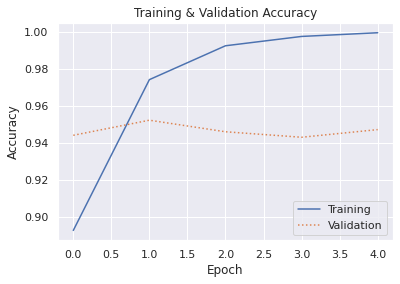

In [ ]:
%matplotlib inline
sns.set()

acc = history.history['accuracy']
val = history.history['val_accuracy']

plt.plot(acc, '-', label='Training')
plt.plot(val, ':', label='Validation')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# Model Optimisation